# Modelo base para generar ecuaciones de Euler-Lagrange

[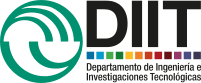](https://ingenieria.unlam.edu.ar/)    
2023 [Mariano Real](mailto:mreal@unlam.edu.ar) | [Víctor Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)

---

Esto es un resumen de lo que vieron en la teórica, que puedan rellenar en cada caso el problema que tengan que resolver. MIREN la teórica, es fundamental tiene más información y está mejor explicada. La idea de esta notebook es simplmente un modelo que puedan usar cuando empiezan un ejercicio nuevo. 

Primero se cargan los módulos de Python necesarios.

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

Se definen los parámetros físicos del sistema, los que no varian con el tiempo.

In [20]:
m1, m2, g, l1, l2 = sym.symbols('m1, m2, g, \ell_1, \ell_2', positive=True) # parámetros del sistema. El \ell es para usar la letra bonita de ele.

Y las coordenadas generalizadas.

In [2]:
e = mech.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
phi1, phi2 = mech.dynamicsymbols(r'\varphi_1, \varphi_2') # variables que cambiaran con el tiempo, por tanto son variables dinámicas
# el r es para que el sistema considere el backslash \ como string

Luego con estas coordenada se escribe la posición de todas las partículas.

In [3]:
m1_r = l1*( sym.cos(phi1)* e.x + sym.sin(phi1)* e.y )
m2_r = m1_r + l2*( sym.cos(phi2)* e.x + sym.sin(phi2)* e.y )
m1_r, m2_r

## Energía cinética $T$

In [4]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [5]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), T_m1 + T_m2 ).simplify()
# sym.Eq(lado iz, lado derecho)
# simplify: simplifica usando factor común y otras operaciones
T

## Energía Potencial $V$ gravitatoria
Para la energía potencial gravitatorio del systema, se usa lo discutido en clase 
$$
    V_i = - \vec{P} \cdot \vec{r}
$$

In [6]:
# Energía potencial
V = sym.Eq(sym.Symbol('V'), - (m1* g* (- e.y)).dot(m1_r) - (m2* g* (e.y)).dot(m2_r) ).simplify()
V

## Ecuaciones de Euler-Lagrange

Como hicimos anteriormente con la energía cinética podemos ahorrar esfuerzo y escribir una sola vez en una función el procedimiento para obtener la ecuación de Euler-Lagrange.
Hay que recordar que habrá tantas ecuaciones como coordenadas generalizadas se utilicen para describir el sistema mecánico.

In [16]:
def EL(T, V, coordenadaGeneralizada):
    """
    A partir de la energía cinética y potencial de todo el sistema devuelve la ecuación de Euler-Lagrange correspondiente a la coordenada generalizada indicada.
    
    Parámetros
    ----------
    T: (sympy.core.relational.Equality)
        ecuación de la energía cinética del sistema
    V: (sympy.core.relational.Equality)
        ecuación de la energía potencial del sistema
    coordenadaGeneralizada: (sympy.core.symbol.Symbol)
        de una de las utilizadas en las expresiones de T y V
    
    Retorna
    -------
    Ecuación de Euler-Lagrange homogénea (sympy.core.relational.Equality)
    """
    lagrangiano = T.rhs- V.rhs # resta de  los lados derechos de T y V
    t = sym.symbols('t') # como se derivan ecuaciones respecto al tiempo con la función diff se declara t como símbolo 
    ecuacionEL = \
        sym.Eq(
            lagrangiano.diff(coordenadaGeneralizada) \
            - lagrangiano.diff(coordenadaGeneralizada.diff(t) ).diff(t) 
        ).simplify()
    return ecuacionEL

In [17]:
phi1_EL = EL(T, V, phi1)
phi1_EL

In [19]:
phi2_EL = EL(T, V, phi2)
phi2_EL